In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_auto = pd.read_csv('module_5_auto.csv')

In [3]:
df_auto = df_auto._get_numeric_data()
df_auto.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
df_auto.size

4221

Libraries for plotting

In [4]:
from ipywidgets import interact,interactive,fixed,interact_manual

### Functions for plotting

In [34]:
def Distributionplot(RedFunction,BlueFunction,RedName,BlueName,Title):
    plt.figure(figsize=(12,10))
    
    ax1= sns.distplot(RedFunction, hist= False, color='r', label=RedName)
    ax2= sns.distplot(BlueFunction,hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in $)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [47]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Training and Testing

In [5]:
y_data = df_auto['price']
x_data = df_auto.drop('price',axis= 1)

In [6]:
x_data

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,3.47,9.0,154.0,5000.0,19,26,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,3.40,10.0,102.0,5500.0,24,30,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,3.40,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,3.15,9.5,114.0,5400.0,23,28,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,3.15,8.7,160.0,5300.0,19,25,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,2.87,8.8,134.0,5500.0,18,23,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,3.40,23.0,106.0,4800.0,26,27,9.038462,Medium,1,0


In [7]:
#split the data in traning and testing the data using function train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.1, random_state=1)


print("number of test samples :", x_test.shape)
print("number of training samples:",x_train.shape)

number of test samples : (21, 30)
number of training samples: (180, 30)


In [13]:
# import liner regression
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [14]:
y_train

159     8058.0
16     36880.0
108    15580.0
31      5399.0
44     32250.0
        ...   
133    18620.0
137     7126.0
72     16503.0
140     9233.0
37      9095.0
Name: price, Length: 180, dtype: float64

In [16]:
# fit the data using the feature 'horsepower'
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [17]:
# Calculate the R^2 score
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

In [18]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [20]:
x_test[['horsepower']]

,horsepower
97,97.0
117,68.0
59,84.0
35,76.0
165,116.0
147,62.0
28,145.0
78,88.0
4,115.0
18,70.0


In [21]:
lre.predict(x_test1[['horsepower']])

array([ 7702.88282951,  8158.10316414, 11496.38561812, 20145.57197615,
       20752.53242233,  9978.98450268, 13772.48729129,  6488.96193716,
       15441.62851828,  7702.88282951,  9827.24439113, 28491.27811109,
        4971.56082171,  5578.52126789, 19083.39119534, 13772.48729129,
        8613.32349878, 13772.48729129, 10130.72461422,  7399.40260642,
        7399.40260642, 13924.22740283, 23787.33465322,  7702.88282951,
        6792.44216025, 28491.27811109,  9978.98450268, 10737.6850604 ,
       18779.91097225, 23787.33465322, 24697.77532248, 17565.9900799 ,
        6488.96193716, 11496.38561812, 12558.56639893, 10434.20483731,
       13772.48729129, 14531.18784901, 10434.20483731, 11799.86584121,
        7551.14271797, 15745.10874136, 12558.56639893, 11496.38561812,
       14682.92796055,  8006.3630526 , 18324.69063762,  7399.40260642,
        7399.40260642, 11344.64550658, 25001.25554557, 28491.27811109,
       12255.08617584, 11799.86584121,  6488.96193716,  7399.40260642,
      

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [24]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [25]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [28]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting and Model Selection

In [30]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression()

In [31]:
## prediction using the training data
yHat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yHat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [32]:
## Prediction using testing data
yHat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yHat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


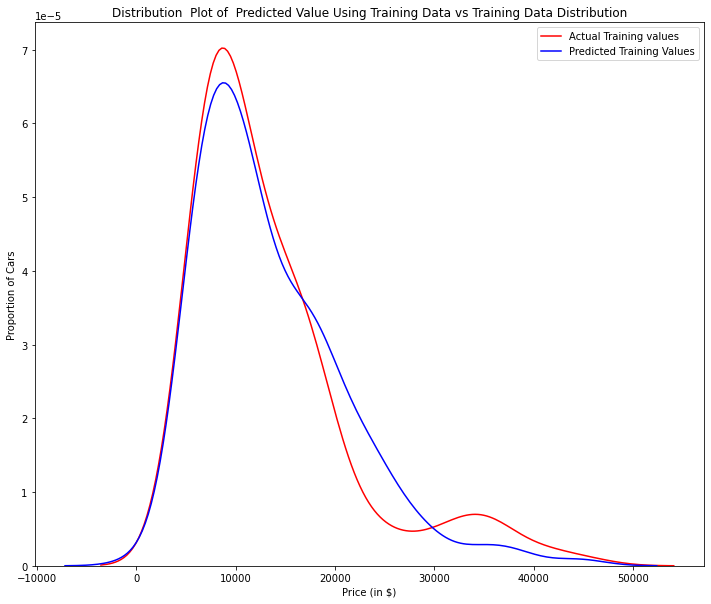

In [35]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Distributionplot(y_train,yHat_train,"Actual Training values","Predicted Training Values", Title)

C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nirav\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


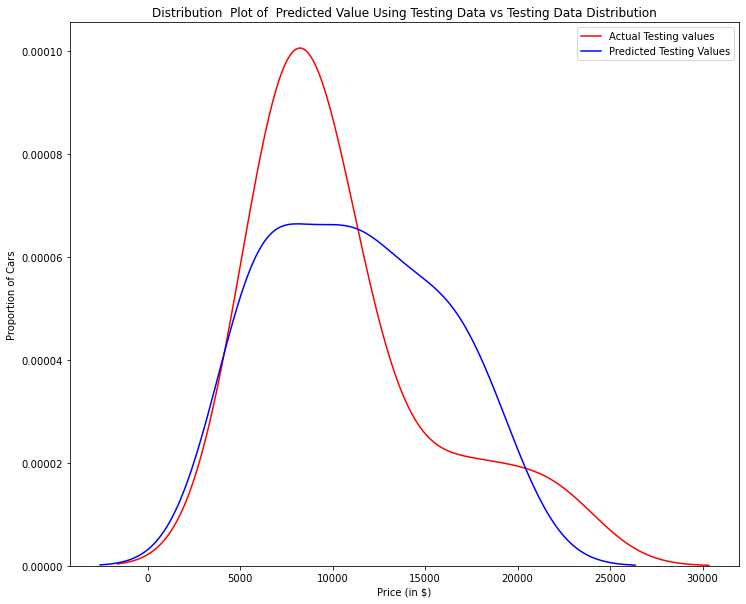

In [36]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution'
Distributionplot(y_test,yHat_test,"Actual Testing values","Predicted Testing Values", Title)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

### overfitting


In [40]:
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [42]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [43]:
print(x_test_pr)

[[1.00000000e+00 9.70000000e+01 9.40900000e+03 9.12673000e+05
  8.85292810e+07 8.58734026e+09]
 [1.00000000e+00 6.80000000e+01 4.62400000e+03 3.14432000e+05
  2.13813760e+07 1.45393357e+09]
 [1.00000000e+00 8.40000000e+01 7.05600000e+03 5.92704000e+05
  4.97871360e+07 4.18211942e+09]
 [1.00000000e+00 7.60000000e+01 5.77600000e+03 4.38976000e+05
  3.33621760e+07 2.53552538e+09]
 [1.00000000e+00 1.16000000e+02 1.34560000e+04 1.56089600e+06
  1.81063936e+08 2.10034166e+10]
 [1.00000000e+00 6.20000000e+01 3.84400000e+03 2.38328000e+05
  1.47763360e+07 9.16132832e+08]
 [1.00000000e+00 1.45000000e+02 2.10250000e+04 3.04862500e+06
  4.42050625e+08 6.40973406e+10]
 [1.00000000e+00 8.80000000e+01 7.74400000e+03 6.81472000e+05
  5.99695360e+07 5.27731917e+09]
 [1.00000000e+00 1.15000000e+02 1.32250000e+04 1.52087500e+06
  1.74900625e+08 2.01135719e+10]
 [1.00000000e+00 7.00000000e+01 4.90000000e+03 3.43000000e+05
  2.40100000e+07 1.68070000e+09]
 [1.00000000e+00 9.20000000e+01 8.46400000e+03 7.7

In [44]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([11976.64286417,  7304.4630846 ,  9679.16311053,  8360.83353469,
       15085.52012752])

In [45]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [11976.64286417  7304.4630846   9679.16311053  8360.83353469]
True values: [ 9549.  6229. 10245.  7295.]


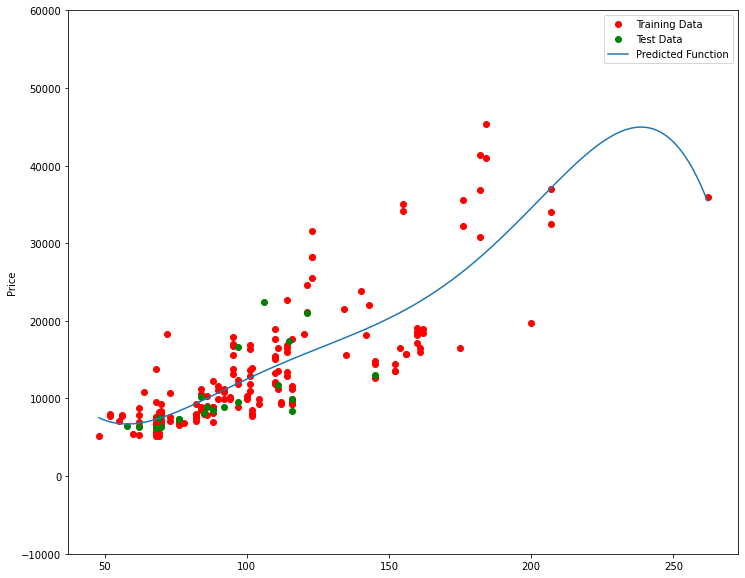

In [49]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [50]:
poly.score(x_train_pr, y_train)

0.6815282763750592

In [51]:
poly.score(x_test_pr, y_test)

0.4030725742171726

## Ridge Regression

In [52]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [53]:
from sklearn.linear_model import Ridge

In [54]:
RigeModel=Ridge(alpha=1)

In [55]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [56]:
yhat = RigeModel.predict(x_test_pr)

In [57]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 9514.3818699   6672.42344634 10534.19951249  5506.01891856]
test set : [ 9549.  6229. 10245.  7295.]


In [58]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 212.02it/s, Test Score=0.682, Train Score=0.858]


In [59]:
Alpha

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15

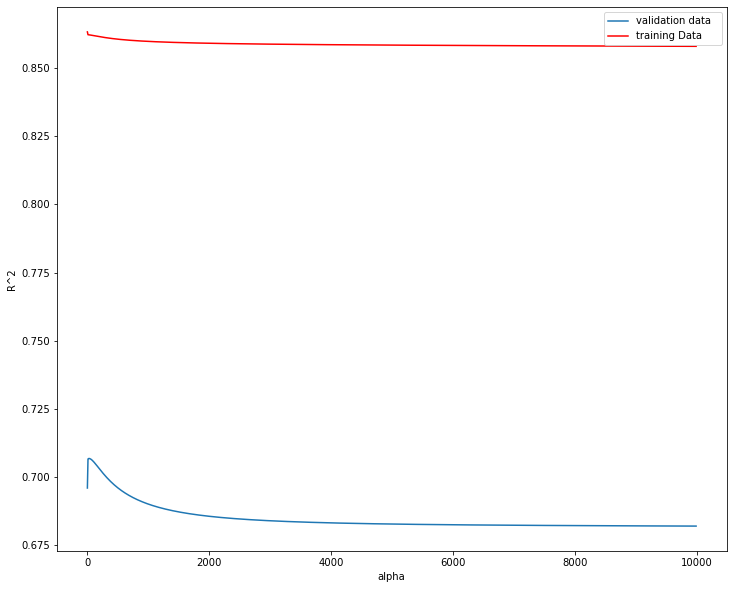

In [60]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [62]:
Rigemodel = Ridge(alpha=10)
Rigemodel.fit(x_train_pr,y_train)
Rigemodel.score(x_test_pr,y_test)

0.7066579427638826

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [65]:
RR=Ridge()
RR

Ridge()

In [68]:
Grid1 = GridSearchCV(RR,parameters1,cv=4)

In [70]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [71]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [72]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6373308904159389

In [73]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Ridge(alpha=0.1, normalize=True)

In [1]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

In [2]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

NameError: name 'interact' is not defined